In [7]:
from collections import Counter
from urllib.parse import urlparse

import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

from config import SCRAPED_DIR

In [2]:
files = list(SCRAPED_DIR.rglob("*.jsonl"))

In [31]:
domains = Counter()
tweets_with_links = 0
tweets_total = 0
restricted_domains = {
    "twitter.com",  # Quoted tweets add a link to content
    "support.twitter.com", # Banned twitter accounts
    "m.in",  # między innymi
}


for f in tqdm(files):
    df = pd.read_json(f, lines=True)
    tweets_total += len(df)

    for _, data in df.iterrows():
        if links := data["links"]:
            add_count = False

            for link in links:
                parsed = urlparse(link)
                domain = parsed.netloc.lower().removeprefix("www.")
                
                if domain not in restricted_domains:
                    domains[domain] += 1
                    add_count = True

            if add_count:
                tweets_with_links += 1


100%|██████████| 1231/1231 [00:38<00:00, 32.02it/s]


Tweets with links: 56068
Total: 1231000
Percentage: 4.55 %


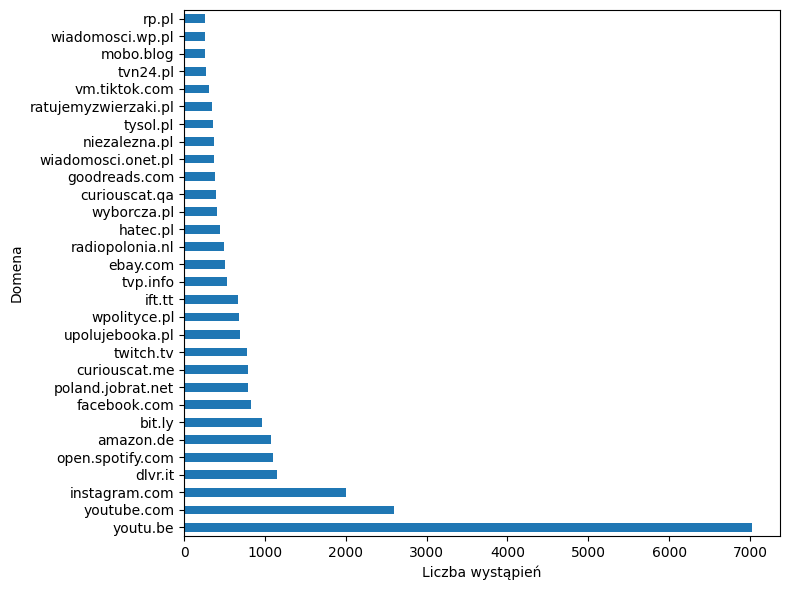

In [45]:
print("Tweets with links:",tweets_with_links)
print("Total:", tweets_total)
print("Percentage:", round(tweets_with_links / tweets_total * 100, 2), "%")

pd.DataFrame(domains.most_common(30), columns=["Domena", "Count"]).plot.barh(x="Domena", y="Count", figsize=(8, 6))
plt.legend().remove()
plt.xlabel("Liczba wystąpień")
plt.tight_layout()
plt.savefig("imgs/wzor_linki.png", dpi=300)

In [33]:
domains.most_common(100)

[('youtu.be', 7020),
 ('youtube.com', 2597),
 ('instagram.com', 2001),
 ('dlvr.it', 1154),
 ('open.spotify.com', 1093),
 ('amazon.de', 1076),
 ('bit.ly', 966),
 ('facebook.com', 823),
 ('poland.jobrat.net', 793),
 ('curiouscat.me', 791),
 ('twitch.tv', 778),
 ('upolujebooka.pl', 697),
 ('wpolityce.pl', 680),
 ('ift.tt', 671),
 ('tvp.info', 534),
 ('ebay.com', 508),
 ('radiopolonia.nl', 487),
 ('hatec.pl', 447),
 ('wyborcza.pl', 402),
 ('curiouscat.qa', 394),
 ('goodreads.com', 387),
 ('wiadomosci.onet.pl', 373),
 ('niezalezna.pl', 368),
 ('tysol.pl', 359),
 ('ratujemyzwierzaki.pl', 342),
 ('vm.tiktok.com', 305),
 ('tvn24.pl', 270),
 ('mobo.blog', 260),
 ('wiadomosci.wp.pl', 257),
 ('rp.pl', 252),
 ('soundcloud.com', 242),
 ('radioo.pl', 233),
 ('cyberfeed.pl', 226),
 ('modeledo.pl', 225),
 ('affinitweet.com', 218),
 ('siepomaga.pl', 205),
 ('onet.pl', 203),
 ('amazon.com', 202),
 ('defence24.pl', 194),
 ('idealdesign.pl', 194),
 ('msn.com', 192),
 ('tinyurl.com', 188),
 ('euroeden.pl',